# Klasyfikacja Metodą K Najbliższych Sąsiadów

## Co to jest klasyfikacja?
Klasyfikacja to inaczej **przydzielanie nowego nieznanego nam elementu do zdefiniowanych wcześniej grup innych elementów**. Robimy to porównując wartości opisujące dany element, czyli jego cechy, z cechami elementów już do jakiejś grupy przydzielonych. 

Wyobraź sobie, że element opisują 2 cechy (na przykład szerokość i waga). Teraz, wymyślmy sobie te już zdefiniowane elementy i przydzielmy je do grup A lub B:

| Szerokość | Waga | Grupa |
|-----------|------|-------|
| 10        | 5    | A     |
| 2         | 5    | B     |
| 5         | 3    | B     |
| 7         | 6    | A     |

Jak widzisz elementy te można przedstawić na grafie 2-wymiarowym. Wystarczy szerokość przedstawić na osi X, a wagę na osi Y. Zróbmy to w Pythonie:

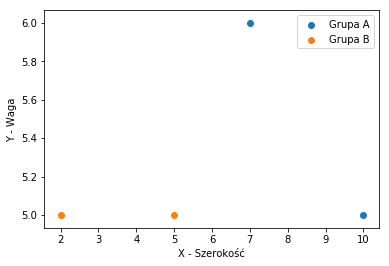

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

A = [10, 7], [5, 6]
B = [2, 5], [5, 5]

plt.scatter(A[0], A[1], label='Grupa A')
plt.scatter(B[0], B[1], label='Grupa B')

plt.xlabel('X - Szerokość')
plt.ylabel('Y - Waga')
plt.legend()
plt.show()

Teraz wprowadźmy nowy niesklasyfikowany element:

| Szerokość | Waga | Grupa |
|-----------|------|-------|
| 10        | 5    | A     |
| 2         | 5    | B     |
| 5         | 3    | B     |
| 7         | 6    | A     |
| 8         | 5    | ?     |

Dodajmy go do naszego grafu:

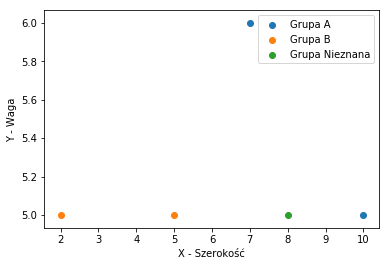

In [2]:
N = [8], [5]

plt.scatter(A[0], A[1], label='Grupa A')
plt.scatter(B[0], B[1], label='Grupa B')
plt.scatter(N[0], N[1], label='Grupa Nieznana')

plt.xlabel('X - Szerokość')
plt.ylabel('Y - Waga')
plt.legend()
plt.show()

**Do jakiej grupy przypiszemy nowy element?** Zadecyduje o tym algorytm K Najbliższych Sąsiadów! (lub inny algorytm klasyfikujący)

## Definicja
Algorytm K Najbliższych Sąsiadów (ang. KNN) jest najprostszym i najwolniejszym algorytmem klasyfikacyjnym. Problematyczny staje się przy dużych zestawach danych.

Polega na znalezieniu **k elementów już sklasyfikowanych** (sąsiadów) najbliższych nowemu elementowi i przydzieleniu tego elementu **do grupy, do której należy większość jego sąsiadów**. 

## Objaśnienie

### Liczenie odległości między 2-wymiarowymi elementami 
Znasz pewnie __twierdzenie Pitagorasa__. Za jego pomocą możemy **obliczyć długość przeciwprostokątnej w trójkącie prostokątnym, znając długości przyprostokątnych**:

$$ c = \sqrt{a^{2} + b^{2}} $$

Liczenie odległości między elementami opisanymi przez 2 cechy działa dokładnie tak samo! Wyobraź sobie **trójkąt prostokątny, w którym odległość między punktami jest przeciwprostokątną**. Wzór na odległość między punktami a i b (gdzie ax to współżędna x dla punktu a itd.) wygląda tak:

$$ O_{ab} = \sqrt{(a_{x} - b_{x})^{2} + (a_{y} - b_{y})^{2}} $$

**Przykład**

$$ O_{(10, 5)(7, 6)} = \sqrt{(10 - 7)^{2} + (5 - 6)^{2}} = \sqrt{10} $$

### Liczenie odległości między n-wymiarowymi elementami
A jak obliczyć odległość między elementami, które opisują **więcej niż 2 cechy?**. W takim wypadku musimy odejść od wizualizacji elementów jako punktów na grafie. Może cię to zaskoczy, ale wzór pozostaje taki sam! Dla 2 elementów a, b **opisywanych przez n cech** (gdzie b1 oznacza 1 cechę opisującą element itd.) wzór wygląda tak:

$$ O_{ab} = \sqrt{(a_{1} - b_{1})^{2} + (a_{2} - b_{2})^{2} + ... + (a_{n} - b_{n})^{2}} $$

Zapiszmy to w Pythonie:

In [3]:
from math import sqrt, ceil

def odleglosc(e1, e2):
    suma_kwadratow = 0
    for a, b in zip(e1, e2):
        suma_kwadratow += ((a - b) ** 2)
    return sqrt(suma_kwadratow)

print("odleglosc([10, 5], [7, 6]) = ", odleglosc([10, 5], [7, 6]))
print("odleglosc([10, 5, 4], [7, 6, 1]) = ", odleglosc([10, 5, 4], [7, 6, 1]))

odleglosc([10, 5], [7, 6]) =  3.1622776601683795
odleglosc([10, 5, 4], [7, 6, 1]) =  4.358898943540674


### Ustalanie zmiennej k
Zmienna k w dużej mierze decyduje o działaniu klasyfikatora. Determinuje ilość najbliższych sąsiadów decydujących o klasyfikacji elementu. Jest liczbą naturalną. Parametr ten jest dowolny, ale jeśli chcemy, żeby nasz klasyfikator działał wydajnie, musimy przyjąć pare założeń:

* K musi być większe od pierwiastka kwadratowego z ilości wszystkich elementów sklasyfikowanych

$$ k \geq \sqrt{n} ,    \;\;\;  n\text{ - ilość elementów sklasyfikowanych } $$

* Jeśli ilość grup jest parzysta, to k musi być nieparzyste. W innym wypadku, k musi być parzyste.

$$k = \begin{cases}
2a + 1 & \text{jeśli } c \mid 2\\ 
2a & \text{w innym wypadku }
\end{cases} \;\;\; c\text{ - ilość grup, } \;\; a \in \mathbb{N}$$

* K musibyć większe od ilości grup

$$ k > c $$

In [4]:
def ustal_k(n, c):
    k = ceil(sqrt(n))
    while k <= c:
        k += 1
    if c % 2 == 0 and k % 2 == 0:
        k += 1
    elif c % 2 == 1 and k % 2 == 1:
        k += 1
    return k

print("ustal_k(100, 7) = ", ustal_k(100, 7))
print("ustal_k(4, 2) = ", ustal_k(4, 2))

ustal_k(100, 7) =  10
ustal_k(4, 2) =  3


## Implementacja
Już wiemy jak obliczyć odległość między elementami i jak wyznaczyć k. Możemy więc dokończyć nasz przykład:

### Obliczmy odległości wszystkich elementów od nowego elementu:

In [5]:
grupa = {
    (10, 5) : 'A',
    (2, 5) : 'B',
    (5, 3) : 'B',
    (7, 6) : 'A'
}
odl = []

nowy = (8, 5)

for elem in grupa.keys():
    odl.append((elem, odleglosc(nowy, elem)))
odl

[((10, 5), 2.0),
 ((2, 5), 6.0),
 ((5, 3), 3.605551275463989),
 ((7, 6), 1.4142135623730951)]

| Szerokość | Waga | Grupa | Odległość |
|-----------|------|-------|-----------|
| 10        | 5    | A     |2.0        |
| 2         | 5    | B     |6.0        |
| 5         | 3    | B     |3.6        |
| 7         | 6    | A     |1.4        |
| 8         | 5    | ?     |-          | 


### Obliczmy wartość k

In [6]:
k = ustal_k(len(grupa), len(set(grupa.values()))) #k dla przykładu
print("k = ", k)

k =  3


### Wyznaczmy k najbliższych sasiadów

In [7]:
import operator
odl.sort(key=operator.itemgetter(1))
k_najblizszych = odl[:k]
k_najblizszych

[((7, 6), 1.4142135623730951), ((10, 5), 2.0), ((5, 3), 3.605551275463989)]

| Szerokość | Waga | Grupa | Odległość |
|-----------|------|-------|-----------|
| 10        | 5    | A     |**2.0**        |
| 2         | 5    | B     |6.0        |
| 5         | 3    | B     |**3.6**        |
| 7         | 6    | A     |**1.4**     |
| 8         | 5    | ?     |-          | 

### Policzmy wystąpienia grup wśród k najbliższych sąsiadów

In [8]:
wyst = {}
for sasiad in k_najblizszych:
    element = grupa[sasiad[0]]
    if element in wyst.keys():
        wyst[element] += 1
    else:
        wyst[element] = 1
wyst

{'A': 2, 'B': 1}

| Grupa |Wystąpienia |
|-----------|------|
| A        | 2    |
| B        | 1    | 

### Wyznaczmy najczęściej występującą grupę wśród sąsiadów

In [9]:
klasyfikacja = max(wyst, key=wyst.get)
print("Nowy element należy do grupy ", klasyfikacja)

Nowy element należy do grupy  A


| Szerokość | Waga | Grupa |
|-----------|------|-------|
| 10        | 5    | A     |
| 2         | 5    | B     |
| 5         | 3    | B     |
| 7         | 6    | A     |
| 8         | 5    | **A**     |

### Gotowe!
Teraz możemy napisać całą funkcję klasyfikacji metodą K Najbliższych Sąsiadów! Oto ona:

In [10]:
print("Wejscie: ", grupa, " i ",  nowy)
print("Słownik sklasyfikowanych elementów (bez nowego) i nowy element")
print()

def klasyfikacja_knn(sklasyfikowane, nowy):
    odl = []
    for elem in sklasyfikowane.keys():
        odl.append((elem, odleglosc(nowy, elem)))
    
    k = ustal_k(len(grupa), len(set(grupa.values())))
    
    odl.sort(key=operator.itemgetter(1))
    k_najblizszych = odl[:k]
    
    wyst = {}
    for sasiad in k_najblizszych:
        element = grupa[sasiad[0]]
        if element in wyst.keys():
            wyst[element] += 1
        else:
            wyst[element] = 1
            
    sklasyfikowane[nowy] = max(wyst, key=wyst.get)
    return sklasyfikowane

print("Wyjscie: ", klasyfikacja_knn(grupa, nowy))
print("Słownik sklasyfikowanych elementów (w tym nowego)")

Wejscie:  {(10, 5): 'A', (2, 5): 'B', (5, 3): 'B', (7, 6): 'A'}  i  (8, 5)
Słownik sklasyfikowanych elementów (bez nowego) i nowy element

Wyjscie:  {(10, 5): 'A', (2, 5): 'B', (5, 3): 'B', (7, 6): 'A', (8, 5): 'A'}
Słownik sklasyfikowanych elementów (w tym nowego)


Jak widzisz klasyfikacja metodą KNN jest bardzo prosta! To tyle!

## Źródła
[How to choose the value of K in knn algorithm](https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606)

"Wprowadzenie Do Algorytmów" Aditya Y. Bhargava